In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot style
plt.style.use('seaborn-whitegrid')


# import dataset from sklearn
from sklearn.datasets import load_iris

# imports for data_splitting, models and metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix

In [2]:
# loading data
iris = load_iris()

In [3]:
print("Description of IRIS Dataset\n\n")
print(iris['DESCR'])

Description of IRIS Dataset


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== 

In [4]:
# creating data frame from loaded data
iris_df = pd.DataFrame(iris["data"], columns=iris["feature_names"])

# mapping the target values [(0, 1, 2)] to target names (['setosa', 'versicolor', 'virginica'])
iris_df["target"] = pd.Categorical.from_codes(iris["target"], iris["target_names"] ) 

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [8]:
iris_df["target"].value_counts()

virginica     50
versicolor    50
setosa        50
Name: target, dtype: int64

From `info()`
- It is a small dataset (only 150 rows)
- Shape of the dataset `(150, 5)`
- Dataset does not contain any missing values
- It is a multivariate classification problem

From `value_counts()`
- Dataset is balanced

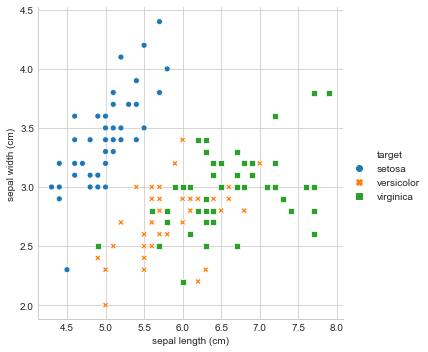

In [9]:
sns.relplot(x="sepal length (cm)", y='sepal width (cm)', hue='target', data=iris_df, kind='scatter',  style='target');

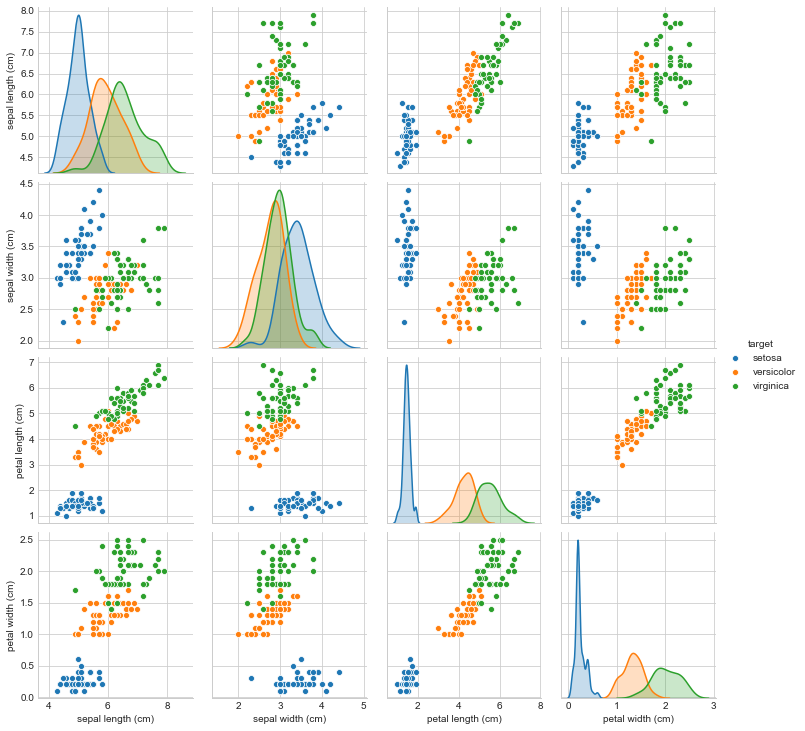

In [10]:
sns.pairplot(data=iris_df, hue='target', kind='scatter')

- From the above plot, **petal length** and **petal width** are the most useful features to classify flowers.
- By seeing distributions we can say that **setosa is linearly seperable** from other two. whereas versicolor and virginica are almost linearly seperable (i.e some **overlap** exists between them)

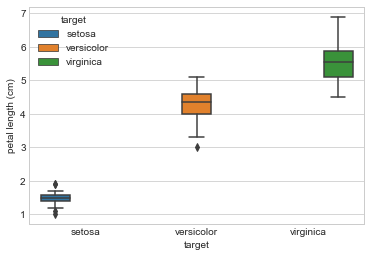

In [11]:
sns.boxplot(x='target', y='petal length (cm)', hue='target', data=iris_df);

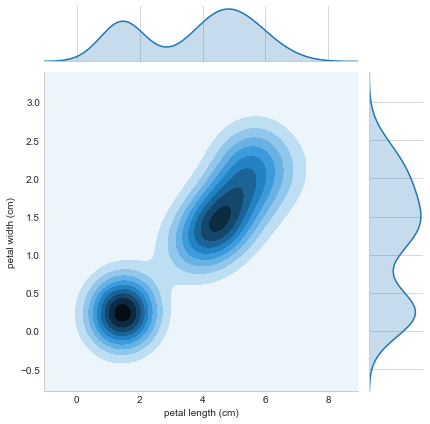

In [12]:
sns.jointplot(x="petal length (cm)", y="petal width (cm)", data=iris_df, kind="kde");

## Data Preperation

In [13]:
X, y = iris.data, iris.target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47)

Implement SVC and KNN classifiers with default parameters

## SVC

In [15]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.96

In [16]:
svc_pred = svc.predict(X_test)
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.82      1.00      0.90         9
           2       1.00      0.90      0.95        21

    accuracy                           0.96        50
   macro avg       0.94      0.97      0.95        50
weighted avg       0.97      0.96      0.96        50



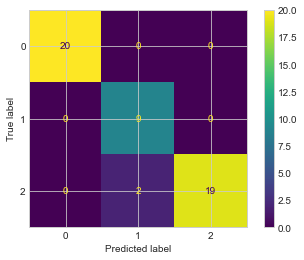

In [17]:
plot_confusion_matrix(svc, X_test, y_test);

In [18]:
confusion_matrix(y_test, svc_pred)

array([[20,  0,  0],
       [ 0,  9,  0],
       [ 0,  2, 19]], dtype=int64)

## K-Nearest Neighbors classifier

In [19]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.98

In [20]:
preds = clf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.90      1.00      0.95         9
           2       1.00      0.95      0.98        21

    accuracy                           0.98        50
   macro avg       0.97      0.98      0.97        50
weighted avg       0.98      0.98      0.98        50



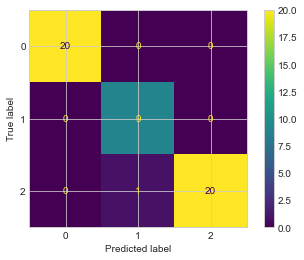

In [21]:
plot_confusion_matrix(clf, X_test, y_test);

In [22]:
confusion_matrix(y_test, preds)

array([[20,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 20]], dtype=int64)